In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import tensorflow as tf
import numpy as np
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.image as mpimg
import glob
from data_utils import load_data, augment_data,normalise_train,normalise_test,rgb2gray,rgb2lab,lab2rgb
import matplotlib.pyplot as plt
from tucha import complex_pokemon_model,baselinish,simpler_model,baselinish2,complex_pokemon_model2,baselinish3

from cs231n.data_utils import load_CIFAR10

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)

Training data shape:  (50000, 32, 32, 3)
Test data shape:  (10000, 32, 32, 3)


In [17]:
def show_images(images,gray = False):   
    if(gray):
        plt.imshow(images,cmap = plt.get_cmap('gray'))
    else :
        plt.imshow(images);

    plt.show()

5.02987


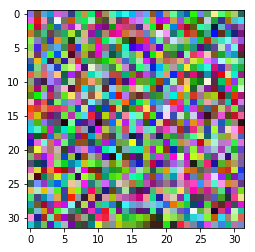

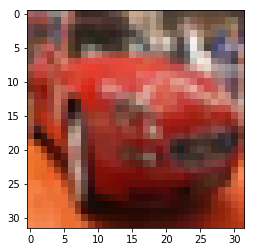

5.93938


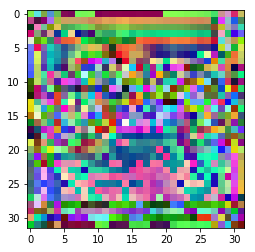

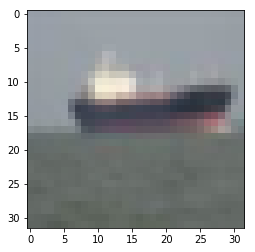

2.2977


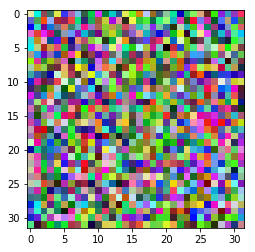

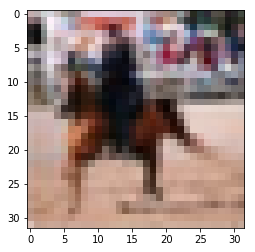

In [ ]:
tf.reset_default_graph()
Y = tf.placeholder(tf.uint8 ,[None , 32,32,3])
is_training = tf.placeholder(tf.bool)


with tf.variable_scope("model") as scope:
    hsv_out,rgb_out,hsv_in,rgb_in = baselinish3(Y,is_training)
    loss = tf.reduce_mean(tf.square(rgb_out-rgb_in))
    
    optimiser = tf.train.AdamOptimizer(3e-3)
    train_step = optimiser.minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

batch_size = 64
epoch_number = 0
def train_epoch(target):
    sizee = target.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y: (target[i*batch_size:batch_size*i+batch_size]),is_training:True}
        losses,_,rgb_o,rgb_i = sess.run([loss,train_step,rgb_out,rgb_in],feed_dict)
        print (losses)
        if(epoch_number % 5 == 0):
            show_images(rgb_o[5])
            show_images(rgb_i[5])

  

def val_result(data, target):
    sizee = data.shape[0]
    for i in range(sizee//batch_size):
        feed_dict = {Y:  (target[i*batch_size:batch_size*i+batch_size]), 
                     X: data[i*batch_size:batch_size*i+batch_size],is_training:False}
        losses = sess.run([loss_test,rgb_out],feed_dict)
        if(i%5 ==0):
            print (losses)

num_epochs = 21
for i in range(num_epochs):
    epoch_number = i
    train_epoch(X_train)
    print ("Next Epoch",i)
